### ZOO dataset으로 다항 분류 모델 작성
animal_name: Unique for each instance
hair Boolean
feathers Boolean
eggs Boolean
milk Boolean
airborne Boolean
aquatic Boolean
predator Boolean
toothed Boolean
backbone Boolean
breathes Boolean
venomous Boolean
fins Boolean
legs Numeric (set of values: {0,2,4,5,6,8})
tail Boolean
domestic Boolean
catsize Boolean
class_type Numeric (integer values in range [1,7])

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import to_categorical   # one-hot encoding 지원
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
url = "https://raw.githubusercontent.com/pykwon/python/refs/heads/master/testdata_utf8/zoo.csv"
datas = pd.read_csv(url)
print(datas.head(3))
x_data = datas.iloc[:, :-1].astype('float32').values
y_data = datas.iloc[:, -1].astype('int32').values
print(x_data[:2], x_data.shape)     # (101, 16)
print(y_data[:2], y_data.shape)     # (101,)
nb_classes = len(set(y_data))
print('classes 범주: ', nb_classes)

# train / test
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   

   brethes  venomous  fins  legs  tail  domestic  catsize  type  
0        1         0     0     4     0         0        1     0  
1        1         0     0     4     1         0        1     0  
2        0         0     1     0     1         0        0     3  
[[1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 4. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 1.]] (101, 16)
[0 0] (101,)
classes 범주:  7


In [19]:
# model
model = Sequential([
    Input(shape=(x_data.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(nb_classes, activation='softmax')
])
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,399 (13.28 KB)

 Trainable params: 3,399 (13.28 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# callback
from tabnanny import verbose


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# restore_best_weights=True: 학습 종료 후 가장 좋은 'val_loss'를 기록한 epoch의 가중치

checkpoint = ModelCheckpoint('best_zoom_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop, checkpoint], verbose=1)

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'최종 평가: Loss:{loss:.4f}, Accuracy:{acc:.4f}')

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.1250 - loss: 1.9175 - val_accuracy: 0.1875 - val_loss: 1.9003
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2344 - loss: 1.8588 - val_accuracy: 0.2500 - val_loss: 1.8524
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2188 - loss: 1.8405 - val_accuracy: 0.3750 - val_loss: 1.8056
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3750 - loss: 1.7262 - val_accuracy: 0.5000 - val_loss: 1.7605
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3438 - loss: 1.7529 - val_accuracy: 0.4375 - val_loss: 1.7141
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3750 - loss: 1.7483 - val_accuracy: 0.5000 - val_loss: 1.6702
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 1.6302 - val_accuracy: 0.5000 - val_loss: 1.6294
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4688 - loss: 1.6096 - val_accuracy: 0.5000 - 

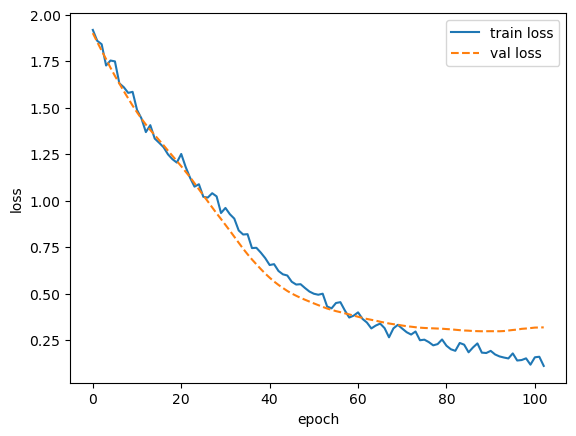

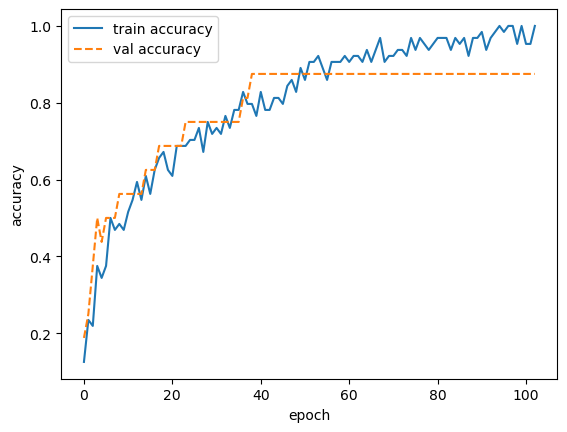

In [21]:
# 학습 곡선 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], '--', label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], '--', label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Confsuion Matrix & Report

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[4 1 3 1 0 0 3 5 0 3 6 0 0 6 0 1 2 5 0 0 1]
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


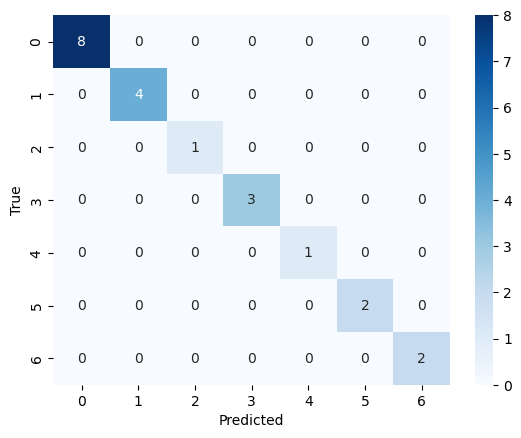

In [22]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(y_pred)
print('Report: ', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# best 모델 읽어 예측하기

In [ ]:
`from tensorflow.keras.models import load_model
best_model = load_model('best_zoom_model.keras')

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'최종 평가: Loss:{loss:.4f}, Accuracy:{acc:.4f}')

# 새로운 데이터 분류
new_data = np.array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 52., 0., 5., 0., 0., 1.]])
probs = best_model.predict(new_data)
print(probs)
pred_class = np.argmax(probs)
print('예측 결과: ', pred_class)`

최종 평가: Loss:0.1315, Accuracy:1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[3.2430943e-22 7.0138950e-31 7.1549523e-03 1.8912462e-23 3.0485655e-17
  3.5030534e-13 9.9284500e-01]]
예측 결과:  6
